<center><h4>K-Modes Analysis (OTTPlatforms)</h4></center>

<br>**Problem statement:**
<br>You have 4 dataset containing the records of movies and TV shows from Netflix, AmazonPrime, Hulu and Disney. Combine them into a single OTT dataset* and use K-modes to
<br> (a) Cluster the dataset
<br> (b) Analyse and describe the clusters
<br> (c) Review the cluster size (k) using Elbow plots

<br>*dataset needs to be cleaned and prepared before using k-modes

*Import required modules*

In [12]:
import pandas as pd                               #Load datasets & clean dataframes
from kmodes.kmodes import KModes                  #Run k modes algorithm
import matplotlib.pyplot as plt                   #Plot outputs
import re                                         #Regular expresion to search string
from wordcloud import WordCloud                   #Running Wordclouds

*Data import & cleansing*

In [13]:
#Load CSV file into a dataframe
NF = pd.read_csv("Datasets/Netflix.csv", delimiter="," )
NF['platform'] = "Netflix"

AP = pd.read_csv("Datasets/AmazonPrime.csv", delimiter="," )
AP['platform'] = "AmazonPrime"

DN = pd.read_csv("Datasets/Disney.csv", delimiter="," )
DN['platform'] = "Disney"

HL = pd.read_csv("Datasets/Hulu.csv", delimiter="," )
HL['platform'] = "Hulu"

# Concatenate the datasets into a single dataframe
OTTDf = pd.concat([NF, AP, DN, HL])

In [14]:
#Reset dataframe indices
OTTDf = OTTDf.reset_index()

#Clean comma separated values
OTTDf[['genre']] = OTTDf.listed_in.str.split(',', expand= True)[[0]]
OTTDf[['primary_country']] = OTTDf.country.str.split(',', expand= True)[[0]]

# Drop ratings with improper inputs
for i in range(0,len(OTTDf)):
    if (re.search('min',str(OTTDf['rating'][i])) or (re.search('season',str(OTTDf['rating'][i]).lower()))):
        OTTDf = OTTDf.drop([i])
        
# Drop unnecessary columns
OTTDf = OTTDf[['type','primary_country','rating','release_year','duration','genre','platform']]

# Drop all missing values
OTTDf = OTTDf.dropna()

*Run k modes algorithm*

In [15]:
kmodes = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
clusters = kmodes.fit_predict(OTTDf)

# Print the cluster centroids
print(kmodes.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1932, cost: 39981.0
Run 1, iteration: 2/100, moves: 108, cost: 39981.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2947, cost: 40222.0
Run 2, iteration: 2/100, moves: 439, cost: 40222.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2131, cost: 42100.0
Run 3, iteration: 2/100, moves: 1127, cost: 41794.0
Run 3, iteration: 3/100, moves: 34, cost: 41794.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3364, cost: 40754.0
Run 4, iteration: 2/100, moves: 1107, cost: 40754.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 921, cost: 41036.0
Best run was number 1
[['Movie' 'United States' 'R' '2017' '94 min' 'Action & Adventu

*Analyse and visualize the clusters*

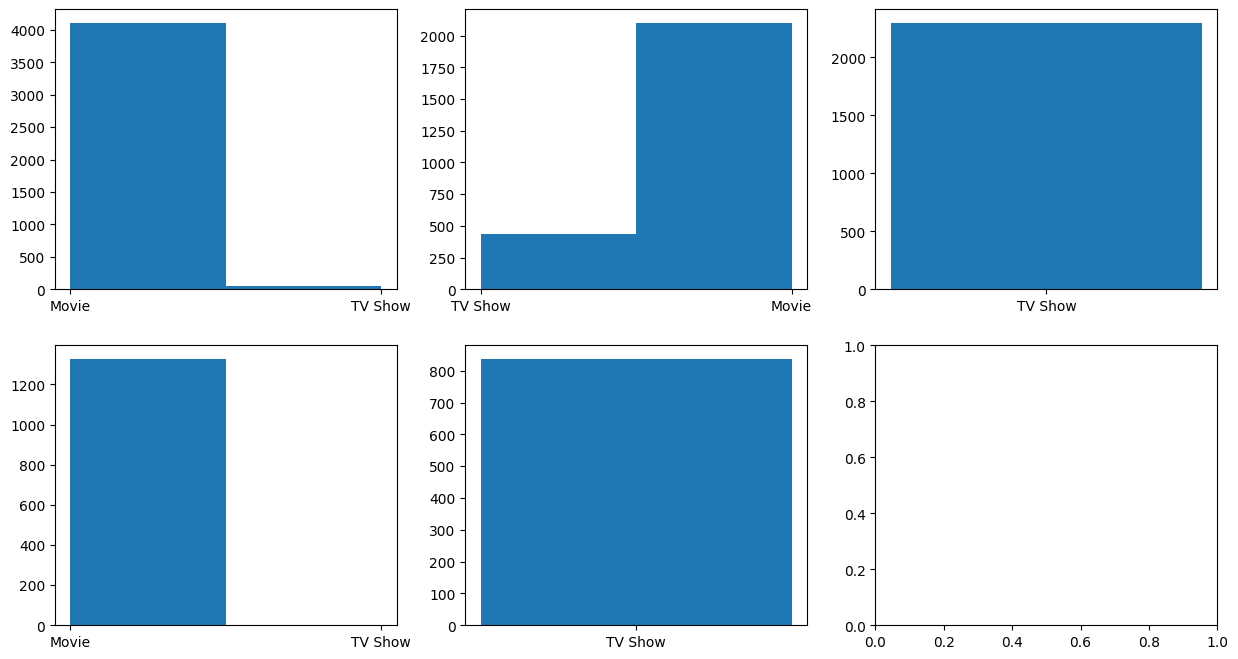

In [16]:
#Understand the distribution of Tv series / movies per cluster
cluster_0 = OTTDf[clusters == 0]
cluster_1 = OTTDf[clusters == 1]
cluster_2 = OTTDf[clusters == 2]
cluster_3 = OTTDf[clusters == 3]
cluster_4 = OTTDf[clusters == 4]

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(15,8))

ax1.hist(cluster_0['type'], bins=len(set(cluster_0['type'])))
ax2.hist(cluster_1['type'], bins=len(set(cluster_1['type'])))
ax3.hist(cluster_2['type'], bins=len(set(cluster_2['type'])))
ax4.hist(cluster_3['type'], bins=len(set(cluster_3['type'])))
ax5.hist(cluster_4['type'], bins=len(set(cluster_4['type'])))


plt.show()

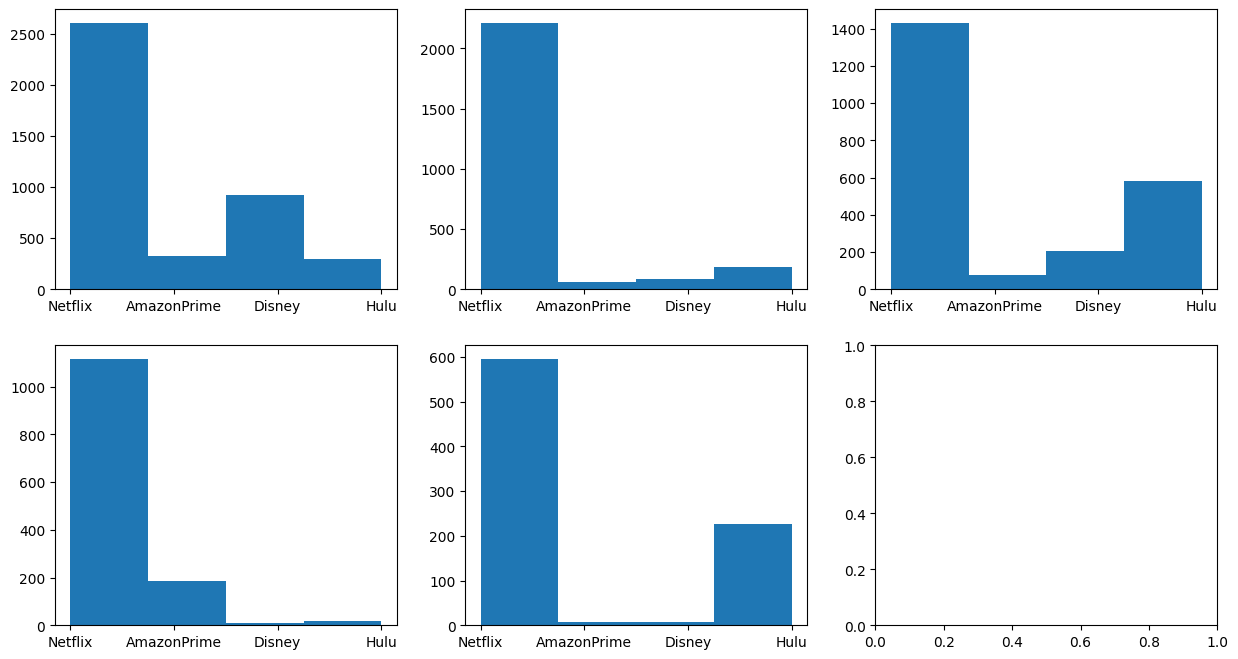

In [17]:
#Understand the distribution of OTT Platforms per cluster
cluster_0 = OTTDf[clusters == 0]
cluster_1 = OTTDf[clusters == 1]
cluster_2 = OTTDf[clusters == 2]
cluster_3 = OTTDf[clusters == 3]
cluster_4 = OTTDf[clusters == 4]

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(15,8))

ax1.hist(cluster_0['platform'], bins=len(set(cluster_0['platform'])))
ax2.hist(cluster_1['platform'], bins=len(set(cluster_1['platform'])))
ax3.hist(cluster_2['platform'], bins=len(set(cluster_2['platform'])))
ax4.hist(cluster_3['platform'], bins=len(set(cluster_3['platform'])))
ax5.hist(cluster_4['platform'], bins=len(set(cluster_4['platform'])))

plt.show()

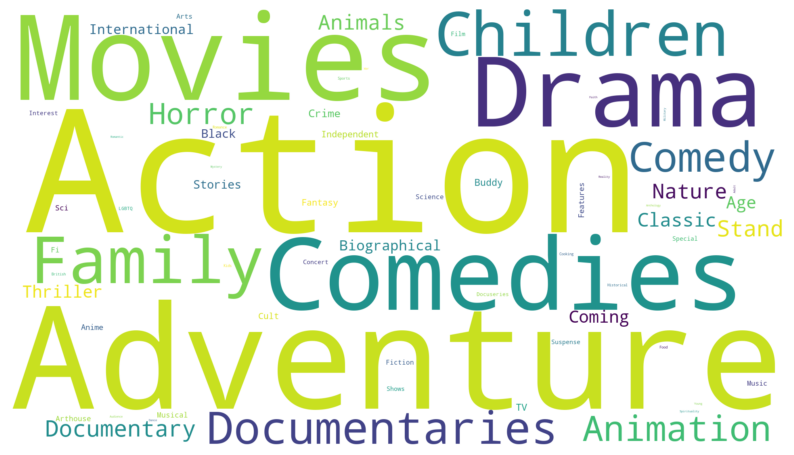

In [18]:
#Understanding the distribution of Genres in cluster 0
unique_string=(" ").join(list(cluster_0['genre']))
X = WordCloud(collocations = False, background_color = 'white', width=1920 , height=1080).generate(unique_string)

# Display the generated Word Cloud
plt.figure(figsize=(10,10))
plt.imshow(X, interpolation='bilinear')
plt.axis("off")
plt.show()

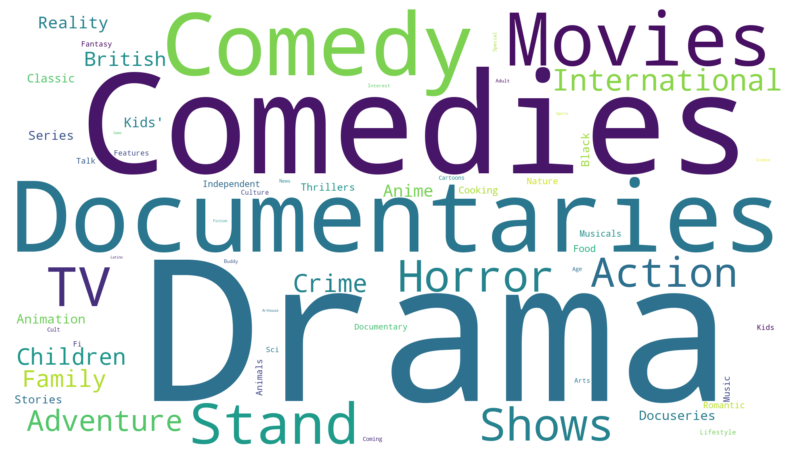

In [19]:
#Understanding the distribution of Genres in cluster 1
unique_string=(" ").join(list(cluster_1['genre']))
X = WordCloud(collocations = False, background_color = 'white', width=1920 , height=1080).generate(unique_string)

# Display the generated Word Cloud
plt.figure(figsize=(10,10))
plt.imshow(X, interpolation='bilinear')
plt.axis("off")
plt.show()

*Elbow Plot*

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 531, cost: 46768.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1261, cost: 46926.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 720, cost: 45288.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 902, cost: 46950.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2131, cost: 46433.0
Run 5, iteration: 2/100, moves: 248, cost: 46433.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2682, cost: 45361.0
Run 1, iteration: 2/100, moves: 1829, cost: 44929.0
Run 1, iteration: 3/100, moves: 654, cost: 44929.0
Init: initializing centroids
Init: 

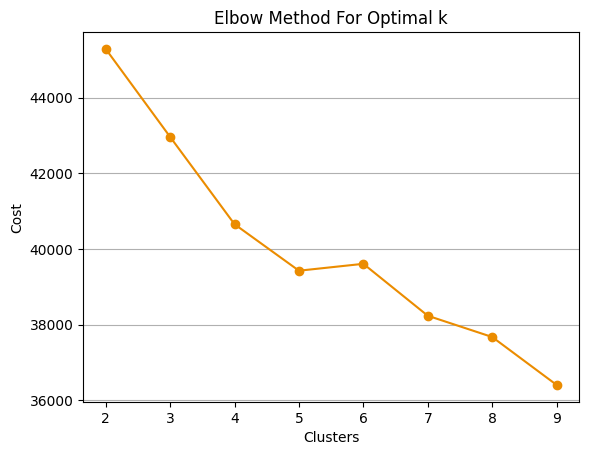

In [20]:
# Elbow curve to find optimal K
cost = []
K = range(2,10)
for num_clusters in list(K):
    kmodes = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmodes.fit_predict(OTTDf)
    cost.append(kmodes.cost_)
    
plt.plot(K, cost, '#EB8C00', marker = 'o')
plt.xlabel('Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.grid(axis='y')
plt.show()